# Introduction to Support Vector Machine (SVM)

In [1]:
import sys
sys.path.append('../my_module')

from sofamethods import bit_error_rate, symbol_error_rate, generate_mesh

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_blobs

## Input data preparation

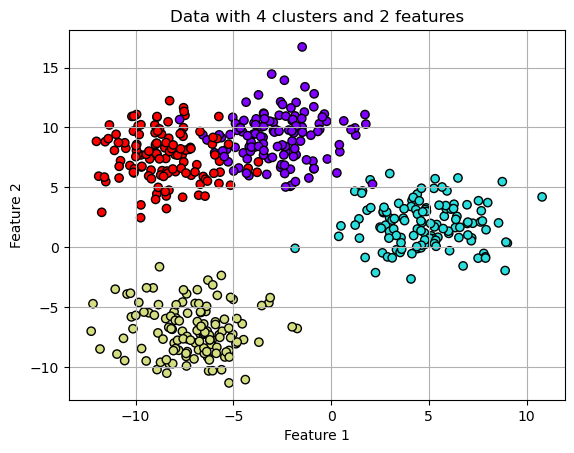

In [2]:
X, y = make_blobs(n_samples=500, centers=4, random_state=42, cluster_std=2.0)

plt.title("Data with 4 clusters and 2 features")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolors='black')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

## SVM implementation

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f%%" % (grid.best_params_, grid.best_score_ * 100))

The best parameters are {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} with a score of 98.00%


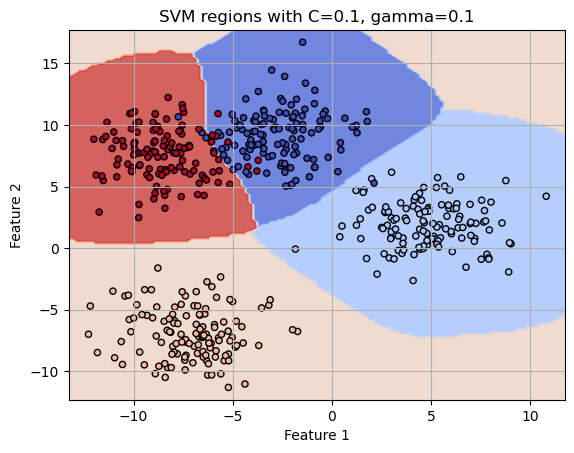

In [4]:
model = SVC(**grid.best_params_).fit(X_train, y_train)
xx, yy, Z = generate_mesh(X_train, model, alpha=0.2)

plt.title("SVM regions with C=%s, gamma=%s" % (grid.best_params_['C'], grid.best_params_['gamma']))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

## Test data prediction

In [5]:
y_pred = model.predict(X_test)

print("Bit Error Rate: %.2f" % (bit_error_rate(y_test, y_pred)))
print("Symbol Error Rate: %.2f" % (symbol_error_rate(y_test, y_pred)))
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))

Bit Error Rate: 0.02
Symbol Error Rate: 0.04
Accuracy: 96.00%
